In [1]:
import math
import numpy as np

def phi(x, y, B, xi):
    phi = 0
    for i in range(3):
        phi = phi + np.exp(-((x-xi[i][0])**2+(y-xi[i][1])**2)/(2*B))
        print(xi[i])
    phi = phi / 3
    return phi

L = 1.5

hbarc = 0.197326 
Bcq = 3.0 * hbarc ** 2
mu, sigma = 0, np.sqrt(Bcq)
# mu, sigma = 0, Bcq
# ri = np.random.normal(0, Bcq, 3) * np.sqrt(2*np.pi) * sigma
search = True
while search:
    r1, r2, r3 = np.random.uniform(-L, L), np.random.uniform(-L, L), np.random.uniform(-L, L)
    if abs(r1-r2)>2*sigma and abs(r1-r3)>2*sigma and abs(r2-r3)>2*sigma:
        ri = [r1, r2, r3]
        break

posi = []

for i in range(len(ri)):
    x = np.random.uniform(0, ri[i])
    y = np.sqrt(ri[i]**2-x**2)
    posi.append([x, y])

B = 0.3 * hbarc ** 2

[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]


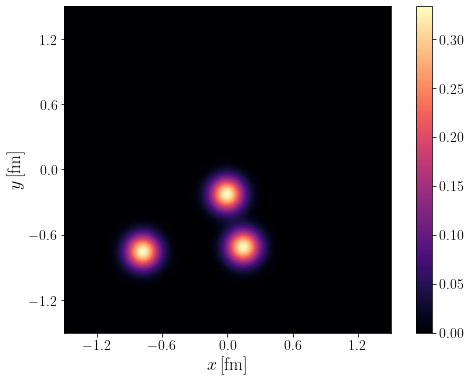

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size':14})

x, y = np.linspace(-L, L, 500), np.linspace(-L, L, 500)
X, Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(9,6))
ax = plt.gca()
res = ax.imshow(phi(X, Y, B, posi), interpolation='spline16', extent = [-L, L, -L, L], cmap='magma')
ax.xaxis.set_major_locator(MultipleLocator(0.6))
ax.yaxis.set_major_locator(MultipleLocator(0.6))

ax.set_xlabel(r'$x\,\mathrm{[fm]}$', size=18)
ax.set_ylabel(r'$y\,\mathrm{[fm]}$', size=18)

plt.colorbar(res, ax=ax)

[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]


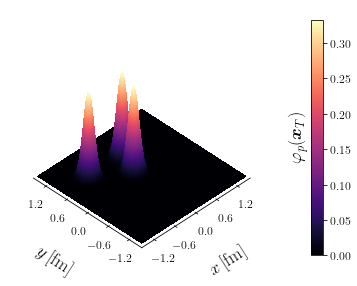

In [3]:
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size':12})
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

fig = plt.figure(figsize=(12,4)) 
ax = fig.add_subplot(111,projection='3d') 
ax.set_proj_type('ortho')
surf = ax.plot_surface(X, Y, phi(X, Y, B, posi), cmap = "magma", linewidth=0, rstride=1, cstride=1, alpha=1, antialiased=False)

ax.set_xlabel(r'$x\,\mathrm{[fm]}$', labelpad=20, size=18)
ax.set_ylabel(r'$y\,\mathrm{[fm]}$', labelpad=20, size=18)

# Set tick marks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.6))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.6))

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

# Remove z-axis
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])

# Adjust plot view
ax.view_init(elev=40, azim=225)
ax.dist=11

# Add colorbar
cbar = plt.colorbar(surf, ax=ax, shrink=0.9)
cbar.set_label(r'$\varphi_p(\bm{x}_T)$', size=18)
cbar.ax.yaxis.set_label_position('left')

ax.set_xlim(-L, L)
ax.set_ylim(-L, L)

fig.tight_layout()

In [4]:
from scipy.integrate import dblquad

def integrand(x, y):
    return phi(x, y, B, posi)**(3/2)

ans, err = dblquad(integrand, -L, L, lambda x: -L, lambda x: L)
print(ans)

[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.7788813693312299, 0.7534928724863418]
[-0.005982475305061965, 0.22745145356765814]
[0.14548748976296988, 0.7121752553677333]
[-0.778881